##What are Convolutions?

Convolutions and Pooling are both used to enhance computer vision. We will use both to expand the capability of the DNN built in the previous lab.

##Limitations of the previous DNN
In the last lab we trained an image classifier for fashion items using the Fashion MNIST dataset. It was a pretty accurate classifier but with the limitation that the images needed to be 28x28, grey scale and with the item centered in the image.

For example here are a couple of the images in Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

The DNN created learned from the raw pixels what made up a sweater, and what made up a boot in this context. But how might it classify this image?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

The classifier would fail for a number of reasons:
it's not 28x28 greyscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not on the features that make up what a boot is.

A convolution is a filter that passes over an image, processes it, and extracts the important features.




The feature mapping process is simple. It scans every pixel in the image and then look at its neighboring pixels. It multiplies the values of those pixels by the corresponding weights in a matrix. The convolution matrix is also called image kernel and it defines the filter.

![Convolution on image](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/f7b0ab29e09a51f_1440.png)

A 3x3 Convolution is specified.

The current pixel value is 192, the new value is 427.



We now create a basic convolution on a 2D Grey Scale image. We can use the 'ascent' image from scipy. It is a built-in picture with lots of angles and lines.

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()


<ipython-input-1-f469e2b82770>:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


We can plot the image with matplotlib:

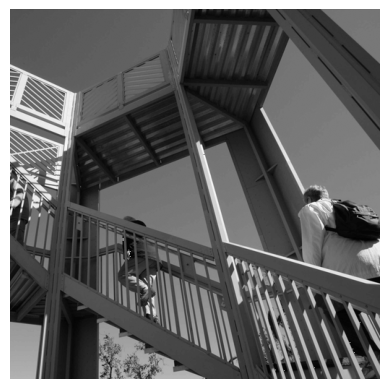

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

It is an image of a stairwell with some strong features, like the vertical lines.

The image is stored as a numpy array, we can create the transformed image by copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we create a convolution matrix, or kernel, as a 3x3 array:
different values correspond to different effects

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

To create the convolution we iterate over the image, leaving a 1 pixel margin, we then multiply the result by the weight, and ensure the result is in the range 0-255.

Finally we load the new value into the transformed image.

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Plot the image to see the effect of the convolution:

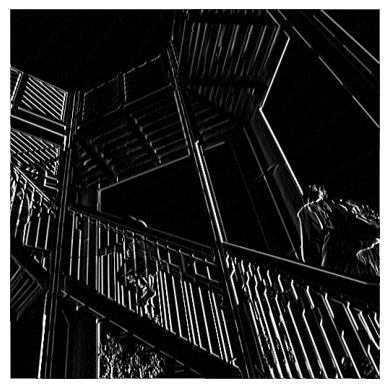

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

![Detecting vertical lines filter](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6f1cc59befac4d33_1440.png)

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

![Detecting horizontal lines](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/705ec1004fce21d4_1440.png)


## Pooling

The purpose of Pooling is to reduce the overall amount of information in an image, while maintaining the features that are detected as present.

There are a number of different types of pooling, but we use one called Maximum (Max) Pooling.

 Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. The new image will be one-fourth the size of the old.

![Max Pooling](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6029904d82700d8e_1440.png)

This code shows a (2, 2) pooling. While the image is 1/4 the size of the original, the extracted features are maintained.



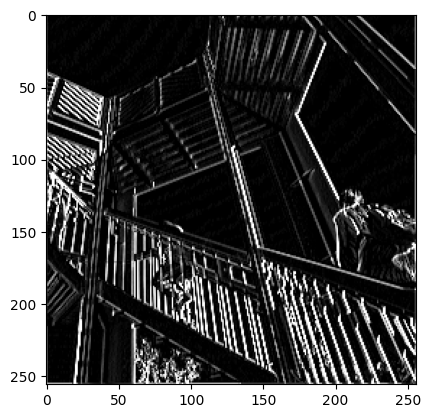

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()



The next step is to add convolutions to the Fashion MNIST neural network to make it more efficient, it will classify based on features, and not on raw pixels.